In [ ]:
# !pip install odc-stac
# !pip isntall planetary_computer
# !pip install pystac_client
# !pip install rich

https://planetarycomputer.microsoft.com/dataset/modis-13A1-061#Example-Notebook

In [4]:
import odc.stac
import planetary_computer
import pystac_client
import rich.table

In [115]:
# Access the data from planetary computer
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [274]:
# UK bounding box
#bbox = [-10.8545, 49.8238, 1.7465, 61.0969]
latitude = 38.6
longitude = -121.5
buffer = 1
bbox = [longitude - buffer, latitude - buffer, longitude + buffer, latitude + buffer]

# Years from 2000 to current year
start_year = 2020
current_year = 2020  # Adjust this to the current year
years = list(range(start_year, current_year + 1))

# Months
months = {
    #"January": "01",
    #"February": "02"
    # "March": "03",
    # "April": "04",
    # "May": "05",
    # "June": "06",
    # "July": "07",
    # "August": "08",
     "September": "09",
    # "October": "10",
    
    # "November": "11",
    # "December": "12"
}

items = dict()

for year in years:
    for month_name, month_number in months.items():
        datetime = f"{year}-{month_number}"
        search = catalog.search(
        collections=["modis-13A1-061"],
            bbox=bbox,
            datetime=datetime
        )
        items[f"{month_name} {year}"] = search.get_all_items()[3]


In [275]:
items.values()

dict_values([<Item id=MYD13A1.A2020249.h08v05.061.2020347075318>])

In [276]:
# # View assets available with Jan 01 as an example
# item = items["January 2001"]

# t = rich.table.Table("Key", "Title")
# for key, asset in items["January 2001"].assets.items():
#     t.add_row(key, asset.title)
# t


In [277]:
items.values()

dict_values([<Item id=MYD13A1.A2020249.h08v05.061.2020347075318>])

In [279]:
data = odc.stac.load(
    items.values(),
    crs="EPSG:3857",
    bands="500m_16_days_NDVI",
    #resolution=500,
    bbox=bbox,
)


In [280]:
#raster = items["January 2001"].assets["250m_16_days_NDVI"].extra_fields["raster:bands"]

#data = data["250m_16_days_NDVI"] * raster[0]["scale"]
data = data["500m_16_days_NDVI"] 

# data

In [281]:
data

<xarray.DataArray '500m_16_days_NDVI' (time: 1, y: 616, x: 481)>
array([[[2945, 2945, 2945, ..., 5715, 5715, 6200],
        [2872, 2686, 2686, ..., 5715, 5715, 5822],
        [2872, 2872, 2846, ..., 5357, 5357, 5467],
        ...,
        [3378, 3378, 5984, ..., 4058, 4058, 4058],
        [5024, 5024, 5890, ..., 4144, 3167, 3167],
        [2429, 2429, 5024, ..., 4314, 4144, 4144]]], dtype=int16)
Coordinates:
  * y            (y) float64 4.808e+06 4.808e+06 ... 4.524e+06 4.523e+06
  * x            (x) float64 -1.364e+07 -1.364e+07 ... -1.341e+07 -1.341e+07
    spatial_ref  int32 3857
  * time         (time) datetime64[ns] 2020-09-05

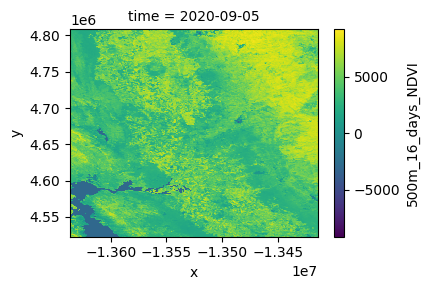

In [282]:
data.plot.imshow(cmap="viridis", col="time");


In [42]:
import rioxarray

# Assuming `data` is your xarray DataArray object

# Specify the filename for the GeoTIFF file
output_tiff = "output.tif"

# Save the DataArray as a GeoTIFF file
data.rio.to_raster(output_tiff)

print("GeoTIFF file saved successfully.")


MissingSpatialDimensionError: y dimension not found. 'rio.set_spatial_dims()' or using 'rename()' to change the dimension name to 'y' can address this. Data variable: time

In [30]:
import rasterio
from rasterio.transform import from_origin

In [31]:
# lon_left =-8.666667  # Adjust as needed
# lat_top =  1.75   # Adjust as needed

pixel_width = 0.00025    # Adjust as needed (e.g., resolution)
pixel_height = 0.00025   # Adjust as needed (e.g., resolution)

# Define the transformation parameters
transform = from_origin(bbox[0], bbox[1], pixel_width, pixel_height)

# Save the DataArray as GeoTIFF
with rasterio.open('output.tif', 'w', driver='GTiff', height=data.shape[1], width=data.shape[2],
                   count=data.shape[0], dtype=str(data.dtype), crs='EPSG:3857', transform=transform) as dst:
    for i in range(data.shape[0]):
        dst.write(data[i, :, :], i + 1)

print("GeoTIFF file saved successfully.")


GeoTIFF file saved successfully.


In [41]:
data.shape[0]

1